# Lab 1: A first look at a neural network

**This is a modified version of the original notebook by Francois Chollet.** 

We will now take a look at a first concrete example of a neural network, which makes use of the Python library Keras to learn to classify hand-written digits. Unless you already have experience with Keras or similar libraries, you will not understand everything about this first example right away. Don't worry, that is perfectly fine. We've got to start somewhere.

The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of "solving" MNIST as the "Hello World" of deep learning -- it's what you do to verify that your algorithms are working as expected. As you become a machine learning practitioner, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on. 

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [1]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

`train_images` and `train_labels` form the "training set", the data that the model will learn from. The model will then be tested on the 
"test set", `test_images` and `test_labels`. Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging 
from 0 to 9. There is a one-to-one correspondence between the images and the labels.

Let's have a look at the training data:

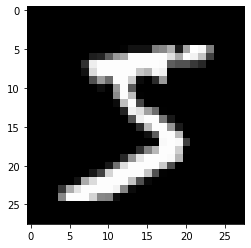

In [2]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap='gray')

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0] # the first image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
train_images[0].shape  # the shape of the first image

(28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels[:6] # first 5 labels

array([5, 0, 4, 1, 9, 2], dtype=uint8)

Let's have a look at the test data:

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

In [10]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)


Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in 
the `[0, 1]` interval. Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with 
values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [11]:
train_images = train_images.astype('float32') / 255
train_images = train_images.reshape((60000, 28 * 28))

test_images = test_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))

### Reshaping an image for the network

The picture below shows the steps involved in converting a 10x10 pixel image into a 1 dimensional array that can be fed into a fully-connected neural network (assuming we do not scale the pixel values). 

<img src="Lab 1 - Pictures-2.jpg" width=600 align="center">

And the picture below should help you visualize what things look like when we consider more than a single sample in our data:

<img src="Lab 1 - Pictures-3.jpg" width=600 align="center">

We also need to categorically encode the labels:

In [12]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
train_labels[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

<img src="Lab 1 - Pictures-5.jpg" width=600 align="center">

Our workflow will be as follow: first we will present our neural network with the training data, `train_images` and `train_labels`. The 
network will then learn to associate images and labels. Finally, we will ask the network to produce predictions for `test_images`, and we 
will verify if these predictions match the labels from `test_labels`.

## Build the network

Let's build our network -- again, remember that you aren't supposed to understand everything about this example just yet.

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

network = Sequential()
network.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(Dense(10, activation='softmax'))


The core building block of neural networks is the "layer", a data-processing module which you can conceive as a "filter" for data. Some data comes in, and comes out in a more useful form. Precisely, layers extract _representations_ out of the data fed into them -- hopefully representations that are more meaningful for the problem at hand. Most of deep learning really consists of chaining together simple layers which will implement a form of progressive "data distillation". A deep learning model is like a sieve for data processing, made of a 
succession of increasingly refined data filters -- the "layers".

Here our network consists of a sequence of two `Dense` layers, which are densely-connected (also called "fully-connected") neural layers. The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes. See this [blog post](https://victorzhou.com/blog/softmax/) for more details on the softmax function. The following picture may help you see what is happening:

<img src="Lab 1 - Pictures-4.jpg" width=600 align="center">

To make our network ready for training, we need to pick three more things, as part of "compilation" step:

* A loss function: this is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be able to steer itself in the right direction.
* An optimizer: this is the mechanism through which the network will update its parameters (weights and biases) based on the data it sees and its loss function. This is like the *gradient descent* recipe for updating the network's parameters.
* Metrics: what to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly classified).

## Compile the network

In [15]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

We are now ready to train our network, which in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data.

## Fit the data

In [16]:
history = network.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=1)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2551 - accuracy: 0.9257
Epoch 2/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1047 - accuracy: 0.9688
Epoch 3/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0686 - accuracy: 0.9797
Epoch 4/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0498 - accuracy: 0.9857
Epoch 5/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0377 - accuracy: 0.9887


Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over 
the training data.

We quickly reach an accuracy of 0.989 (i.e. 98.9%) on the training data. 

## Check test accuracy

Now let's check that our model performs well on the test set too:

In [17]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 84us/sample - loss: 0.0618 - accuracy: 0.9814


In [18]:
print('test_acc:', test_acc)

test_acc: 0.9814



Our test set accuracy turns out to be around 98%, which is lower than the training set accuracy. 
This gap between training accuracy and test accuracy is an example of "overfitting", 
the fact that machine learning models tend to perform worse on new data than on their training data. 

This concludes our very first example -- you just saw how we could build and train a neural network to classify handwritten digits, in less than 20 lines of Python code. 

**epoch** 
  - one epoch is reached when all training examples have been sent through the network
  
**batch size**
  - the training data is not sent through the network one at time but in batches; this is another hyperparamter to be set. In this example the batch size was set to 128


## Your turn

Rerunning the network means executing the following steps:
- Build the network
- Compile the network
- Fit the data
- Check test accuracy

**For each exercise, first make a complete copy of the `network` in the *Build the network* section and then modify according to the exercise instructions.**

### Exercise 1 (5 marks)

- change the activation in the hidden layer to 'sigmoid'
- rerun the network
- what is the new value for the training accuracy? 
- what is the new value for the test accuracy?

In [19]:
network = Sequential()
network.add(Dense(512, activation='sigmoid', input_shape=(28 * 28,)))
network.add(Dense(10, activation='softmax'))

In [20]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [21]:
history = network.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=1)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.4286 - accuracy: 0.8841
Epoch 2/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2338 - accuracy: 0.9318
Epoch 3/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1771 - accuracy: 0.9490
Epoch 4/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1403 - accuracy: 0.9593
Epoch 5/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1136 - accuracy: 0.9664


## Test Accuracy

In [22]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 133us/sample - loss: 0.1141 - accuracy: 0.9660


In [23]:
print('test_acc:', test_acc)

test_acc: 0.966


## Train Accuracy

In [24]:
train_loss, train_acc = network.evaluate(train_images, train_labels)

60000/60000 [==============================] - 8s 136us/sample - loss: 0.0981 - accuracy: 0.9716


In [25]:
print('train_acc:', train_acc)

train_acc: 0.9716


### Exercise 2 (5 marks)

- change the activation in the hidden layer back to 'relu'
- change the batch size to 32
- rerun the network
- what is the new value for the training accuracy? 
- what is the new value for the test accuracy?
- was the speed effected?

In [26]:
network = Sequential()
network.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(Dense(10, activation='softmax'))

In [27]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [28]:
history = network.fit(train_images, train_labels, epochs=5, batch_size=32, verbose=1)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 14s 237us/sample - loss: 0.2013 - accuracy: 0.9403
Epoch 2/5
60000/60000 [==============================] - 13s 223us/sample - loss: 0.0891 - accuracy: 0.9745
Epoch 3/5
60000/60000 [==============================] - 13s 221us/sample - loss: 0.0648 - accuracy: 0.9820
Epoch 4/5
60000/60000 [==============================] - 13s 221us/sample - loss: 0.0502 - accuracy: 0.9858
Epoch 5/5
60000/60000 [==============================] - 13s 213us/sample - loss: 0.0399 - accuracy: 0.9890


#### yes, it took more time. Speed got slow

## Train Accuracy

In [29]:
train_loss, train_acc = network.evaluate(train_images, train_labels)

60000/60000 [==============================] - 8s 129us/sample - loss: 0.0303 - accuracy: 0.9915


In [30]:
print('train_acc:', train_acc)

train_acc: 0.99153334


## Test Accuracy

In [31]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 121us/sample - loss: 0.0967 - accuracy: 0.9768


In [32]:
print('test_acc:', test_acc)

test_acc: 0.9768


### Exercise 3 (5 marks)

- change the number of epochs to 10
- rerun the network
- what is the new value for the training accuracy? 
- what is the new value for the test accuracy?

In [33]:
network = Sequential()
network.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(Dense(10, activation='softmax'))

In [34]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [35]:
history = network.fit(train_images, train_labels, epochs=10, batch_size=32, verbose=1)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 236us/sample - loss: 0.2017 - accuracy: 0.9409
Epoch 2/10
60000/60000 [==============================] - 13s 216us/sample - loss: 0.0903 - accuracy: 0.9736
Epoch 3/10
60000/60000 [==============================] - 12s 208us/sample - loss: 0.0638 - accuracy: 0.9820
Epoch 4/10
60000/60000 [==============================] - 12s 208us/sample - loss: 0.0499 - accuracy: 0.9863
Epoch 5/10
60000/60000 [==============================] - 12s 207us/sample - loss: 0.0400 - accuracy: 0.9889
Epoch 6/10
60000/60000 [==============================] - 13s 213us/sample - loss: 0.0324 - accuracy: 0.9916
Epoch 7/10
60000/60000 [==============================] - 12s 208us/sample - loss: 0.0268 - accuracy: 0.9925
Epoch 8/10
60000/60000 [==============================] - 12s 207us/sample - loss: 0.0234 - accuracy: 0.9938
Epoch 9/10
60000/60000 [==============================] - 12s 208us/sample - loss: 0.0183 - accuracy: 0.9

## Train Accuracy

In [36]:
train_loss, train_acc = network.evaluate(train_images, train_labels)

60000/60000 [==============================] - 6s 93us/sample - loss: 0.0078 - accuracy: 0.9979


In [37]:
print('train_acc:', train_acc)

train_acc: 0.9979


## Test Accuracy

In [38]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 117us/sample - loss: 0.1045 - accuracy: 0.9799


In [39]:
print('test_acc:', test_acc)

test_acc: 0.9799


### Exercise 4 (5 marks)

- change the number of neurons in the hidden layer to 128
- rerun the network
- what is the new value for the training accuracy? 
- what is the new value for the test accuracy?

In [40]:
network = Sequential()
network.add(Dense(128, activation='relu', input_shape=(28 * 28,)))
network.add(Dense(10, activation='softmax'))

In [41]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [42]:
history = network.fit(train_images, train_labels, epochs=10, batch_size=32, verbose=1)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 176us/sample - loss: 0.2556 - accuracy: 0.9268
Epoch 2/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.1226 - accuracy: 0.9638
Epoch 3/10
60000/60000 [==============================] - 10s 169us/sample - loss: 0.0888 - accuracy: 0.9746
Epoch 4/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0701 - accuracy: 0.9801
Epoch 5/10
60000/60000 [==============================] - 10s 162us/sample - loss: 0.0595 - accuracy: 0.9832
Epoch 6/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0509 - accuracy: 0.9864
Epoch 7/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0453 - accuracy: 0.9879
Epoch 8/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0387 - accuracy: 0.9894
Epoch 9/10
60000/60000 [==============================] - 10s 163us/sample - loss: 0.0339 - accuracy: 0.9906
Ep

## Train Accuracy

In [43]:
train_loss, train_acc = network.evaluate(train_images, train_labels)

60000/60000 [==============================] - 4s 68us/sample - loss: 0.0237 - accuracy: 0.9935s - loss: 0.0240 


In [44]:
print('train_acc:', train_acc)

train_acc: 0.9935


## Test Accuracy

In [45]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 112us/sample - loss: 0.1035 - accuracy: 0.9774


In [46]:
print('test_acc:', test_acc)

test_acc: 0.9774


### Exercise 5 (10 marks)

- to the original network, add a second hidden layer of 128 neurons (note that `input_shape` does note need to be set for a second *Dense* layer)
- rerun the network
- what is the new value for the training accuracy? 
- what is the new value for the test accuracy?

In [47]:
network = Sequential()
network.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(Dense(128, activation='relu'))
network.add(Dense(10, activation='softmax'))

In [48]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [49]:
history = network.fit(train_images, train_labels, epochs=5, batch_size=32, verbose=1)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 16s 259us/sample - loss: 0.1936 - accuracy: 0.9425
Epoch 2/5
60000/60000 [==============================] - 13s 221us/sample - loss: 0.0929 - accuracy: 0.9742
Epoch 3/5
60000/60000 [==============================] - 13s 224us/sample - loss: 0.0721 - accuracy: 0.9808
Epoch 4/5
60000/60000 [==============================] - 13s 216us/sample - loss: 0.0591 - accuracy: 0.9855
Epoch 5/5
60000/60000 [==============================] - 13s 218us/sample - loss: 0.0505 - accuracy: 0.9874


## Train Accuracy

In [50]:
train_loss, train_acc = network.evaluate(train_images, train_labels)

60000/60000 [==============================] - 6s 92us/sample - loss: 0.0402 - accuracy: 0.9888


In [51]:
print('train_acc:', train_acc)

train_acc: 0.98878336


## Test Accuracy

In [52]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 158us/sample - loss: 0.1284 - accuracy: 0.9756


In [53]:
print('test_acc:', test_acc)

test_acc: 0.9756


### Exercise 6 (10 marks)

There is a good chance that the network from the previous exercise is overfitting. One way to manage overfitting in a network is to add a **dropout** layer. A dropout layer will randomly "turn off" (or *drop*) a fraction of the neurons in a layer. This makes it harder for the network to 'memorize' the training data. 

- add a dropout layer after the first hidden layer (see the [keras documentation](https://keras.io/layers/core/))
- rerun the network
- what is the new value for the training accuracy? 
- what is the new value for the test accuracy?

In [54]:
import tensorflow
from tensorflow.keras.layers import Activation, Dropout, Dense

In [55]:
network = Sequential()
network.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(Dropout(0.4))
network.add(Dense(128, activation='relu'))
network.add(Dense(10, activation='softmax'))

In [56]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [57]:
history = network.fit(train_images, train_labels, epochs=5, batch_size=32, verbose=1)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 13s 213us/sample - loss: 0.2501 - accuracy: 0.9259
Epoch 2/5
60000/60000 [==============================] - 12s 202us/sample - loss: 0.1402 - accuracy: 0.9620
Epoch 3/5
60000/60000 [==============================] - 12s 203us/sample - loss: 0.1207 - accuracy: 0.9684
Epoch 4/5
60000/60000 [==============================] - 12s 200us/sample - loss: 0.1153 - accuracy: 0.9713
Epoch 5/5
60000/60000 [==============================] - 13s 212us/sample - loss: 0.1120 - accuracy: 0.9737


## Train Accuracy

In [58]:
train_loss, train_acc = network.evaluate(train_images, train_labels)

60000/60000 [==============================] - 8s 126us/sample - loss: 0.0646 - accuracy: 0.9842


In [59]:
print('train_acc:', train_acc)

train_acc: 0.9841667


## Test Accuracy

In [60]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 149us/sample - loss: 0.1151 - accuracy: 0.9764


In [61]:
print('test_acc:', test_acc)

test_acc: 0.9764


## Exercise 7 - Individual Work (10 marks per group member)

**CHALLENGE:** State of the art accuracy for the MNIST dataset is 99.84%. How close can you get?

- Each group member should create a new fully-connected network. You can find information in the [keras documentation](https://keras.io/). Things to try:
     - additional layers
     - number of neurons per layer
     - batch size
     - learning rate
     - activation functions
     - weight initializations
     - different optimizers
- Each network should have at least 3 characteristics that are different from every other network submitted in this lab, which includes Exercises 1-6 and the networks created by your other group members. 
- Please specify which group member created which network 

# Siddharth Singh

In [62]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(64, (1,1), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Using TensorFlow backend.


In [63]:
model.compile(optimizer=SGD(learning_rate=0.0001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [64]:
history = network.fit(train_images, train_labels, epochs=5, batch_size=64, verbose=1)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 147us/sample - loss: 0.0885 - accuracy: 0.9783
Epoch 2/5
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0799 - accuracy: 0.9806
Epoch 3/5
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0722 - accuracy: 0.9820
Epoch 4/5
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0665 - accuracy: 0.9830
Epoch 5/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0674 - accuracy: 0.9834


In [65]:
train_loss, train_acc = network.evaluate(train_images, train_labels)

60000/60000 [==============================] - 8s 141us/sample - loss: 0.0263 - accuracy: 0.9929


In [66]:
print('train_acc:', train_acc)

train_acc: 0.99291664


In [67]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 138us/sample - loss: 0.0999 - accuracy: 0.9821


In [68]:
print('test_acc:', test_acc)

test_acc: 0.9821


## Sai Sahas Elluru-0753808

In [69]:
from keras.optimizers import adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras import initializers
from tensorflow import random

In [70]:
random.set_seed(0)
model_s = Sequential()
model_s.add(Dense(512, kernel_initializer='random_normal', activation='hard_sigmoid', input_shape=(28 * 28,)))
model_s.add(Dense(128, activation='exponential'))
model_s.add(Dropout(0.50))
model_s.add(Dense(64, activation='relu'))
model_s.add(Dense(10, activation='sigmoid'))

In [71]:
model_s.compile(optimizer=adam(learning_rate=0.0001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [72]:
history = model_s.fit(train_images, train_labels, epochs=10, batch_size=16, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 27s 450us/step - loss: 0.1833 - accuracy: 0.9323
Epoch 2/10
60000/60000 [==============================] - 27s 456us/step - loss: 0.0829 - accuracy: 0.9699
Epoch 3/10
60000/60000 [==============================] - 28s 463us/step - loss: 0.0646 - accuracy: 0.9771
Epoch 4/10
60000/60000 [==============================] - 27s 448us/step - loss: 0.0551 - accuracy: 0.9808
Epoch 5/10
60000/60000 [==============================] - 27s 446us/step - loss: 0.0484 - accuracy: 0.9832
Epoch 6/10
60000/60000 [==============================] - 27s 444us/step - loss: 0.0436 - accuracy: 0.9849
Epoch 7/10
60000/60000 [==============================] - 27s 447us/step - loss: 0.0397 - accuracy: 0.9863
Epoch 8/10
60000/60000 [==============================] - 27s 455us/step - loss: 0.0368 - accuracy: 0.9872
Epoch 9/10
60000/60000 [==============================] - 27s 448us/step - loss: 0.0336 - accuracy: 0.9884
Epoch 10/10
60000/60000 [============

In [73]:
train_loss, train_acc = model_s.evaluate(train_images, train_labels)

60000/60000 [==============================] - 4s 72us/step


In [74]:
print('train_acc:', train_acc)

train_acc: 0.9921898245811462


In [75]:
test_loss, test_acc = model_s.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 73us/step


In [76]:
print('test_acc:', test_acc)

test_acc: 0.9914198517799377
